<a href="https://colab.research.google.com/github/armandochernandez-ai/Curso-python-slava/blob/main/Clima/PRONOSTICO_PMAX24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

#Cargar Base de datos
file_path = '/content/drive/My Drive/Clima_Jalisco/estaciones_jalmes_FL.csv'
df_clima = pd.read_csv(file_path)
display(df_clima.head())
display(df_clima.info())

#Filtrar datos para ejemplo
df_filtered = df_clima[df_clima['Codigo'] == 14002].copy()
display(df_filtered.head())
display(df_filtered.info())

#Calculo de pmax24 anual
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered = df_filtered.set_index('date')
pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()
pmax24_annual_max = pmax24_annual_max.dropna()
display(pmax24_annual_max.head())

#Preparar datos para análisis de tendencia
pmax24_sorted = pmax24_annual_max.sort_values(ascending=False)
df_sorted = pmax24_sorted.to_frame().reset_index()
n = len(df_sorted)
df_sorted['rank'] = range(1, n + 1)
df_sorted['probability'] = df_sorted['rank'] / (n + 1)
df_sorted['return_period'] = (n + 1) / df_sorted['rank']
display(df_sorted.head())

#Selección y ordenar variable por periodo de retorno
y = df_sorted['pmax24']
# Modified: Create X DataFrame using a dictionary
X = pd.DataFrame({'log_return_period': np.log(df_sorted['return_period'])})

display(X.head())
display(y.head())

# Check if X is empty before fitting the model
if not X.empty:
    #Cálculo de modelo
    modelo = LinearRegression()
    modelo.fit(X, y)
    print(f"Coeficiente: {modelo.coef_}")
    print(f"Intercepto: {modelo.intercept_}")

    # Generar el gráfico de tendencia
    fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
    ax.scatter(df_sorted['return_period'], y, label='Datos') # Use return period on the x-axis
    ax.plot(df_sorted['return_period'], modelo.predict(X), color='red', label='Tendencia Lineal') # Plot regression line against return period
    ax.set_xlabel('Años (retorno)') # Change x-axis label to 'Periodo de Retorno'
    ax.set_ylabel('pmax24 Anual')
    # Modified: Include site and code in the title
    site_name = df_filtered['site'].iloc[0] if not df_filtered.empty else 'Unknown Site'
    site_code = df_filtered['Codigo'].iloc[0] if not df_filtered.empty else 'Unknown Code'
    ax.set_title(f'TENDENCIA DE pmax24 ANUAL {site_name} ({site_code})')
    ax.legend()
    ax.grid(True)

    # Add model parameters and formula to the plot
    intercept = modelo.intercept_
    coef = modelo.coef_[0]
    formula = f'y = {intercept:.2f} + ({coef:.2f} * log(x))'
    textstr = f'a (Intercepto): {intercept:.2f}\nb (Coeficiente): {coef:.2f}\nFórmula: {formula}'
    ax.text(0.7, 0.05, textstr, transform=ax.transAxes, fontsize=8,
             verticalalignment='bottom', horizontalalignment='left', bbox=dict(boxstyle='round,pad=0.5', fc='skyblue', alpha=0.5))

    plt.tight_layout() # Adjust layout to prevent labels overlapping

    # Directorio para guardar resultados
    save_dir = '/content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24'
    os.makedirs(save_dir, exist_ok=True)
    file_path = os.path.join(save_dir, f'pmax24_{site_name}_{site_code}.png') # Changed filename

    # GUardar el gráfico de tendencia
    plt.savefig(file_path)

    # Display the plot in the notebook
    plt.show()

    plt.close(fig) # Close the figure using the figure object

    print(f"Scatter plot saved to {file_path}")
else:
    print("X is empty. Cannot fit the model.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully.
Found 233 unique stations.
Save directory created: /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24

Processing station code: 14002
  Coeficiente: [21.20570336]
  Intercepto: 38.739051463698885


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ACATLAN DE JUAREZ_14002.png

Processing station code: 14004
  Coeficiente: [13.50129619]
  Intercepto: 30.86483346244963


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AGOSTADERO_14004.png

Processing station code: 14005
  Coeficiente: [25.30701883]
  Intercepto: 34.818318305616216


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AHUIJULLO_14005.png

Processing station code: 14006
  Coeficiente: [17.17054094]
  Intercepto: 36.956329239744434


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AJOJUCAR_14006.png

Processing station code: 14007
  Coeficiente: [31.96222482]
  Intercepto: 54.35672952223318


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ACIHUATL_14007.png

Processing station code: 14008
  Coeficiente: [18.53596387]
  Intercepto: 25.735476261419752


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AMACUECA_14008.png

Processing station code: 14009
  Coeficiente: [17.11340696]
  Intercepto: 42.20002222399546


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AMECA_14009.png

Processing station code: 14010
  Coeficiente: [13.29520983]
  Intercepto: 52.18696019806795


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ANTONIO ESCOBEDO (SMN)_14010.png

Processing station code: 14011
  Coeficiente: [83.16754713]
  Intercepto: 53.60397147386752


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_APAZULCO_14011.png

Processing station code: 14013
  Coeficiente: [20.64242015]
  Intercepto: 36.188253233049366


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ATEMAJAC DE BRIZUELA_14013.png

Processing station code: 14014
  Coeficiente: [14.26660252]
  Intercepto: 34.852958050379186


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ATENGO (SMN)_14014.png

Processing station code: 14015
  Coeficiente: [24.42193083]
  Intercepto: 42.576201885221494


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ATENGUILLO_14015.png

Processing station code: 14016
  Coeficiente: [18.39249036]
  Intercepto: 42.661987902276074


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ATEQUIZA_14016.png

Processing station code: 14017
  Coeficiente: [24.12875263]
  Intercepto: 35.9818689074901


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ATOTONILCO EL ALTO_14017.png

Processing station code: 14018
  Coeficiente: [16.06403189]
  Intercepto: 33.57104890125762


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ATOYAC_14018.png

Processing station code: 14019
  Coeficiente: [30.15439893]
  Intercepto: 40.886389004604055


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AUTLAN_14019.png

Processing station code: 14020
  Coeficiente: [12.91051169]
  Intercepto: 40.80263726177703


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AYO EL CHICO_14020.png

Processing station code: 14021
  Coeficiente: [40.4312025]
  Intercepto: 58.744222371381014


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_AYOTITLAN_14021.png

Processing station code: 14023
  Coeficiente: [15.32431576]
  Intercepto: 34.87615544819736


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_BOLAÑOS_14023.png

Processing station code: 14024
  Coeficiente: [51.11499521]
  Intercepto: 66.70944112681485


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CAJON DE PEÑA_14024.png

Processing station code: 14025
  Coeficiente: [11.99265304]
  Intercepto: 12.038621790929183


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CALERA_14025.png

Processing station code: 14026
  Coeficiente: [17.50559304]
  Intercepto: 37.52827368653905


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CASA LLANTA_14026.png

Processing station code: 14027
  Coeficiente: [50.33595683]
  Intercepto: 55.70782193838907


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CASIMIRO CASTILLO_14027.png

Processing station code: 14028
  Coeficiente: [93.34939837]
  Intercepto: 74.27288506940343


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CIHUATLAN (DGE)_14028.png

Processing station code: 14029
  Coeficiente: [26.06386733]
  Intercepto: 32.47233359580403


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CONCEPCION DE BUENOS AIRES_14029.png

Processing station code: 14030
  Coeficiente: [30.28609107]
  Intercepto: 32.8267338432249


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CIUDAD GUZMAN (OBS)_14030.png

Processing station code: 14031
  Coeficiente: [22.5212525]
  Intercepto: 42.368260677191444


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CIUDAD VENUSTIANO CARRANZA_14031.png

Processing station code: 14032
  Coeficiente: [18.72902433]
  Intercepto: 23.89695535337191


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_COLOTLAN (OBS)_14032.png

Processing station code: 14033
  Coeficiente: [15.39685067]
  Intercepto: 39.351022904034295


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_COMANJA DE CORONA_14033.png

Processing station code: 14034
  Coeficiente: [23.24312088]
  Intercepto: 50.81360739737006


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CONTLA_14034.png

Processing station code: 14035
  Coeficiente: [23.761029]
  Intercepto: 45.81904145870868


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CORRINCHIS II_14035.png

Processing station code: 14036
  Coeficiente: [61.36587008]
  Intercepto: 65.19436805505826


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CUAUTITLAN_14036.png

Processing station code: 14037
  Coeficiente: [11.69275173]
  Intercepto: 32.56851554088503


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PRESA ACHIMEC_14037.png

Processing station code: 14038
  Coeficiente: [15.08895525]
  Intercepto: 42.890807000825205


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CUIXTLA_14038.png

Processing station code: 14039
  Coeficiente: [12.94064403]
  Intercepto: 43.90706703914729


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CUQUIO_14039.png

Processing station code: 14040
  Coeficiente: [21.04844202]
  Intercepto: 45.28767756345694


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CHAPALA_14040.png

Processing station code: 14042
  Coeficiente: [46.55987433]
  Intercepto: 49.34547379867196


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CUITZMALA_14042.png

Processing station code: 14043
  Coeficiente: [22.49115857]
  Intercepto: 41.512682946044066


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EJUTLA_14043.png

Processing station code: 14044
  Coeficiente: [50.78597735]
  Intercepto: 77.53170851805953


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL BRAMADOR_14044.png

Processing station code: 14046
  Coeficiente: [26.98176157]
  Intercepto: 33.6963149327825


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL CHANTE_14046.png

Processing station code: 14047
  Coeficiente: [16.70535238]
  Intercepto: 47.89810326710166


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL FUERTE_14047.png

Processing station code: 14048
  Coeficiente: [49.30777508]
  Intercepto: 62.21185287824438


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL CHIFLON_14048.png

Processing station code: 14050
  Coeficiente: [19.25863033]
  Intercepto: 35.582279672194815


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL GRULLO_14050.png

Processing station code: 14052
  Coeficiente: [24.93319689]
  Intercepto: 34.496896036631966


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL NOGAL_14052.png

Processing station code: 14053
  Coeficiente: [13.23710748]
  Intercepto: 36.04269317440804


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL PINITO_14053.png

Processing station code: 14054
  Coeficiente: [27.61432338]
  Intercepto: 26.63621525532885


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL PUESTO_14054.png

Processing station code: 14056
  Coeficiente: [20.08032063]
  Intercepto: 45.15854181520617


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL SALITRE_14056.png

Processing station code: 14057
  Coeficiente: [9.9266115]
  Intercepto: 35.40707816642579


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL SALTO_14057.png

Processing station code: 14058
  Coeficiente: [14.47387489]
  Intercepto: 31.509693668351296


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL TECUAN_14058.png

Processing station code: 14059
  Coeficiente: [47.78262767]
  Intercepto: 67.55480577073786


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL TUITO_14059.png

Processing station code: 14060
  Coeficiente: [16.46524832]
  Intercepto: 42.27952714997879


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EL TULE_14060.png

Processing station code: 14062
  Coeficiente: [20.57354354]
  Intercepto: 35.16987666084039


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ENCARNACION DE DIAZ_14062.png

Processing station code: 14063
  Coeficiente: [18.15991834]
  Intercepto: 48.23840912390936


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ETZATLAN (SMN)_14063.png

Processing station code: 14064
  Coeficiente: [12.05361848]
  Intercepto: 44.87792026207606


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_EX HACIENDA SAN DIEGO_14064.png

Processing station code: 14065
  Coeficiente: [16.24599928]
  Intercepto: 47.747613137215666


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_GUADALAJARA (OBS)_14065.png

Processing station code: 14066
  Coeficiente: [18.76719739]
  Intercepto: 45.973672298353634


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_GUADALAJARA (DGE)_14066.png

Processing station code: 14067
  Coeficiente: [77.39468136]
  Intercepto: 47.53920130025013


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HIGUERA BLANCA_14067.png

Processing station code: 14068
  Coeficiente: [25.21171126]
  Intercepto: 41.474183740525135


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HOSTOTIPAQUILLO_14068.png

Processing station code: 14069
  Coeficiente: [15.35659693]
  Intercepto: 34.182968457562865


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HUEJUCAR (OBS)_14069.png

Processing station code: 14070
  Coeficiente: [14.56398023]
  Intercepto: 44.33659610043526


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HUASCATO_14070.png

Processing station code: 14071
  Coeficiente: [18.37018296]
  Intercepto: 18.536718956968322


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HUEJUQUILLA EL ALTO (DGE)_14071.png

Processing station code: 14072
  Coeficiente: [17.63659359]
  Intercepto: 48.97372635945411


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HUERTA VIEJA_14072.png

Processing station code: 14073
  Coeficiente: [12.72368978]
  Intercepto: 39.14406291711253


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_IXTLAHUACAN DEL RIO_14073.png

Processing station code: 14074
  Coeficiente: [15.6380894]
  Intercepto: 41.69073285133517


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_JALOSTOTITLAN_14074.png

Processing station code: 14075
  Coeficiente: [18.59394016]
  Intercepto: 43.70430864993294


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_JAMAY_14075.png

Processing station code: 14076
  Coeficiente: [17.34250011]
  Intercepto: 43.00471578780932


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_JESUS MARIA_14076.png

Processing station code: 14077
  Coeficiente: [17.67288656]
  Intercepto: 40.62113562027982


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_JOCOTEPEC_14077.png

Processing station code: 14078
  Coeficiente: [17.69061013]
  Intercepto: 42.8308014733602


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_JUCHITLAN_14078.png

Processing station code: 14079
  Coeficiente: [39.97301364]
  Intercepto: 51.39483769552619


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA COFRADIA_14079.png

Processing station code: 14080
  Coeficiente: [15.83926804]
  Intercepto: 38.69109147938323


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA CUÑA_14080.png

Processing station code: 14081
  Coeficiente: [31.57872134]
  Intercepto: 65.6112606456468


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA DESEMBOCADA_14081.png

Processing station code: 14083
  Coeficiente: [18.86116939]
  Intercepto: 21.965754639934627


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LAGOS DE MORENO (OBS)_14083.png

Processing station code: 14084
  Coeficiente: [16.14413551]
  Intercepto: 35.28532296597454


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LAGOS DE MORENO (DGE)_14084.png

Processing station code: 14085
  Coeficiente: [40.19536184]
  Intercepto: 39.47489004572229


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA HUERTA_14085.png

Processing station code: 14086
  Coeficiente: [21.63634599]
  Intercepto: 34.312636820449924


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA MANZANILLA DE LA PAZ_14086.png

Processing station code: 14087
  Coeficiente: [14.97385346]
  Intercepto: 41.31010390008182


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA RED_14087.png

Processing station code: 14089
  Coeficiente: [20.3524678]
  Intercepto: 47.13527040253571


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA VEGA_14089.png

Processing station code: 14090
  Coeficiente: [15.33417534]
  Intercepto: 43.78447571024379


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LA YERBABUENA_14090.png

Processing station code: 14093
  Coeficiente: [20.53808139]
  Intercepto: 44.81722601463231


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MAGDALENA_14093.png

Processing station code: 14094
  Coeficiente: [30.24415388]
  Intercepto: 43.2225164260239


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MANANTLAN_14094.png

Processing station code: 14095
  Coeficiente: [31.68521782]
  Intercepto: 50.13355146789572


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MANUEL M. DIEGUEZ (CFE)_14095.png

Processing station code: 14096
  Coeficiente: [21.23355479]
  Intercepto: 45.692335793941865


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MASCOTA (SMN)_14096.png

Processing station code: 14098
  Coeficiente: [11.79570268]
  Intercepto: 31.20754063850952


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MEZQUITIC_14098.png

Processing station code: 14099
  Coeficiente: [53.61950455]
  Intercepto: 21.727064051587362


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MAZAMITLA_14099.png

Processing station code: 14100
  Coeficiente: [29.32583713]
  Intercepto: 24.767829250447413


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MEXTICACAN_14100.png

Processing station code: 14101
  Coeficiente: [14.55325634]
  Intercepto: 33.15577156041337


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MICHOACANEJO_14101.png

Processing station code: 14103
  Coeficiente: [13.97637643]
  Intercepto: 25.402460019511544


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_OJUELOS DE JALISCO (SMN)_14103.png

Processing station code: 14104
  Coeficiente: [18.68615551]
  Intercepto: 32.90474267823443


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PALO VERDE_14104.png

Processing station code: 14105
  Coeficiente: [10.62604919]
  Intercepto: 47.205051980524225


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PASO DE ANALCO (CFE)_14105.png

Processing station code: 14106
  Coeficiente: [12.615136]
  Intercepto: 32.2570788381467


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PASO DEL CUARENTA I_14106.png

Processing station code: 14107
  Coeficiente: [9.53103431]
  Intercepto: 43.24430174775352


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PASO DE LA YESCA_14107.png

Processing station code: 14108
  Coeficiente: [13.20907173]
  Intercepto: 36.22069675197578


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PASO DEL SABINO_14108.png

Processing station code: 14109
  Coeficiente: [41.11986464]
  Intercepto: 54.445865648643476


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PIHUAMO_14109.png

Processing station code: 14110
  Coeficiente: [13.72529678]
  Intercepto: 45.15218969487404


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PLAN DE BARRANCAS_14110.png

Processing station code: 14111
  Coeficiente: [15.33429639]
  Intercepto: 43.12658181940941


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PONCITLAN_14111.png

Processing station code: 14112
  Coeficiente: [30.96088642]
  Intercepto: 36.80834510558005


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PRESA TROJES_14112.png

Processing station code: 14113
  Coeficiente: [15.38025093]
  Intercepto: 43.65361239155449


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PRESA HURTADO_14113.png

Processing station code: 14114
  Coeficiente: [17.60464606]
  Intercepto: 35.39325997699062


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PRESA LA DUQUESA_14114.png

Processing station code: 14115
  Coeficiente: [9.48613509]
  Intercepto: 49.76959223131733


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PUENTE ARCEDIANO (CFE)_14115.png

Processing station code: 14116
  Coeficiente: [27.6811959]
  Intercepto: 76.55206975245378


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PUERTO VALLARTA_14116.png

Processing station code: 14117
  Coeficiente: [41.06013765]
  Intercepto: 62.21204589606768


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_VILLA PURIFICACION (DGE)_14117.png

Processing station code: 14118
  Coeficiente: [37.47377052]
  Intercepto: 40.01216330181139


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_QUITO_14118.png

Processing station code: 14119
  Coeficiente: [20.94665938]
  Intercepto: 28.34086512886965


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_QUITUPAN (CFE)_14119.png

Processing station code: 14121
  Coeficiente: [13.85656897]
  Intercepto: 48.38627070154327


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_GUADALAJARA (SMN)_14121.png

Processing station code: 14122
  Coeficiente: [21.48545546]
  Intercepto: 30.401818579336442


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN BERNARDO_14122.png

Processing station code: 14123
  Coeficiente: [24.48021273]
  Intercepto: 25.711407787501173


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN DIEGO DE ALEJANDRIA_14123.png

Processing station code: 14125
  Coeficiente: [30.83441732]
  Intercepto: 39.47410131669355


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN GREGORIO_14125.png

Processing station code: 14126
  Coeficiente: [12.56843177]
  Intercepto: 42.79965627987398


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN JUAN DE LOS LAGOS_14126.png

Processing station code: 14127
  Coeficiente: [13.24798455]
  Intercepto: 33.65003744142547


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN JUANICO_14127.png

Processing station code: 14128
  Coeficiente: [14.0563408]
  Intercepto: 43.18353432093495


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN JULIAN (DGE)_14128.png

Processing station code: 14129
  Coeficiente: [23.91745333]
  Intercepto: 25.400107121636296


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN MARCOS_14129.png

Processing station code: 14130
  Coeficiente: [13.59632976]
  Intercepto: 47.46923085557114


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN MARTIN HIDALGO_14130.png

Processing station code: 14131
  Coeficiente: [12.46315321]
  Intercepto: 41.44730830857523


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN MIGUEL EL ALTO_14131.png

Processing station code: 14132
  Coeficiente: [19.13935586]
  Intercepto: 44.27002353629928


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TLAQUEPAQUE_14132.png

Processing station code: 14133
  Coeficiente: [18.6676668]
  Intercepto: 46.50025520506988


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SAN SEBASTIAN DEL OESTE_14133.png

Processing station code: 14134
  Coeficiente: [14.82523959]
  Intercepto: 42.61265739501571


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SANTA CLARA_14134.png

Processing station code: 14135
  Coeficiente: [15.20412781]
  Intercepto: 37.553664430780756


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SANTA MARIA DE LOS ANGELES_14135.png

Processing station code: 14136
  Coeficiente: [21.37680715]
  Intercepto: 43.699369618846774


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SANTA ROSA_14136.png

Processing station code: 14138
  Coeficiente: [46.01508443]
  Intercepto: 53.82804751541449


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_SEHUAYA_14138.png

Processing station code: 14139
  Coeficiente: [17.58606423]
  Intercepto: 38.084417386230385


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TACOTAN_14139.png

Processing station code: 14140
  Coeficiente: [31.21861311]
  Intercepto: 37.390017224788224


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TALPA DE ALLENDE_14140.png

Processing station code: 14141
  Coeficiente: [25.81420121]
  Intercepto: 42.59848516424745


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_INGENIO TAMAZULA_14141.png

Processing station code: 14142
  Coeficiente: [24.70194738]
  Intercepto: 42.114270891695384


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TAPALPA (SMN)_14142.png

Processing station code: 14143
  Coeficiente: [17.26267352]
  Intercepto: 46.82795377466694


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TECOLOTLAN (DGE)_14143.png

Processing station code: 14144
  Coeficiente: [16.81425434]
  Intercepto: 35.54475337142706


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TENASCO_14144.png

Processing station code: 14145
  Coeficiente: [16.4622338]
  Intercepto: 30.286863188857147


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TEOCALTICHE (DGE)_14145.png

Processing station code: 14146
  Coeficiente: [24.0179813]
  Intercepto: 27.939234167066516


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TEOCUITATLAN_14146.png

Processing station code: 14147
  Coeficiente: [14.03181285]
  Intercepto: 46.478173149467985


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TEPATITLAN_14147.png

Processing station code: 14148
  Coeficiente: [47.87495194]
  Intercepto: 64.9751353134842


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TECOMATES_14148.png

Processing station code: 14151
  Coeficiente: [21.01142691]
  Intercepto: 35.643183217825296


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TOLIMAN (SMN)_14151.png

Processing station code: 14152
  Coeficiente: [38.45305738]
  Intercepto: 57.6661444565562


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TOMATLAN_14152.png

Processing station code: 14153
  Coeficiente: [20.99083393]
  Intercepto: 35.78293643627565


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TOTATICHE_14153.png

Processing station code: 14154
  Coeficiente: [16.15064054]
  Intercepto: 37.76797210295079


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TOTOTLAN_14154.png

Processing station code: 14155
  Coeficiente: [19.54560155]
  Intercepto: 49.86034428800552


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TUXCACUESCO_14155.png

Processing station code: 14156
  Coeficiente: [16.07732862]
  Intercepto: 37.74051663059442


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TUXCUECA_14156.png

Processing station code: 14157
  Coeficiente: [19.46188114]
  Intercepto: 40.03842840926541


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_UNION DE SAN ANTONIO_14157.png

Processing station code: 14158
  Coeficiente: [22.3886245]
  Intercepto: 39.14436908242305


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_UNION DE TULA_14158.png

Processing station code: 14159
  Coeficiente: [15.3116847]
  Intercepto: 43.2416047578683


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_VALLE DE GUADALUPE_14159.png

Processing station code: 14160
  Coeficiente: [34.42244409]
  Intercepto: 28.283503059994445


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_VALLE DE JUAREZ (DGE)_14160.png

Processing station code: 14162
  Coeficiente: [12.61805637]
  Intercepto: 48.25427755326747


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_PRESA SANTA ROSA (CFE)_14162.png

Processing station code: 14163
  Coeficiente: [11.05946613]
  Intercepto: 37.90486505835569


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_VILLA CORONA_14163.png

Processing station code: 14164
  Coeficiente: [12.62504329]
  Intercepto: 41.967575560773085


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_VILLA GUERRERO_14164.png

Processing station code: 14165
  Coeficiente: [14.92267543]
  Intercepto: 39.81475047608919


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_VILLA OBREGON_14165.png

Processing station code: 14167
  Coeficiente: [18.96248152]
  Intercepto: 33.535240612919026


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_YAHUALICA DE GONZALEZ GALLO (SMN)_14167.png

Processing station code: 14168
  Coeficiente: [17.17469365]
  Intercepto: 20.616790320813166


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ZACOALCO DE TORRES_14168.png

Processing station code: 14169
  Coeficiente: [15.00948486]
  Intercepto: 48.77148108033653


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ZAPOPAN_14169.png

Processing station code: 14170
  Coeficiente: [27.12679471]
  Intercepto: 32.60608503949182


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ZAPOTILTIC_14170.png

Processing station code: 14171
  Coeficiente: [19.00489721]
  Intercepto: 39.5834434947068


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_ZAPOTLANEJO (SMN)_14171.png

Processing station code: 14174
  Coeficiente: [45.21213577]
  Intercepto: 47.46047467219978


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_CIHUATLAN (SMN)_14174.png

Processing station code: 14175
  Coeficiente: [9.28503487]
  Intercepto: 28.77804726883456


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_COLOTLAN (DGE)_14175.png

Processing station code: 14176
  Coeficiente: [10.40455426]
  Intercepto: 32.64195893274021


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_HUEJUQUILLA EL ALTO (SMN)_14176.png

Processing station code: 14177
  Coeficiente: [23.31452897]
  Intercepto: 41.2495557237916


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_LOS OLIVOS_14177.png

Processing station code: 14178
  Coeficiente: [17.9585313]
  Intercepto: 38.26491705870606


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_MASCOTA (DGE)_14178.png

Processing station code: 14179
  Coeficiente: [26.53957573]
  Intercepto: 31.72046872088071


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_OJUELOS DE JALISCO (DGE)_14179.png

Processing station code: 14180
  Coeficiente: [28.12311954]
  Intercepto: 26.261500797727212


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_QUITUPAN_14180.png

Processing station code: 14184
  Coeficiente: [25.15568263]
  Intercepto: 35.53681645297333


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TAPALPA (DGE)_14184.png

Processing station code: 14185
  Coeficiente: [16.03502926]
  Intercepto: 42.01442438670395


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TECOLOTLAN (SMN)_14185.png

Processing station code: 14186
  Coeficiente: [8.78784958]
  Intercepto: 33.094957671835665


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TEOCALTICHE (SMN)_14186.png

Processing station code: 14187
  Coeficiente: [22.34177467]
  Intercepto: 39.12930839836149


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


  Scatter plot saved to /content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24/pmax24_trend_TEQUILA_14187.png

Processing station code: 14188
  Coeficiente: [10.09298098]
  Intercepto: 38.6186042342043


/tmp/ipython-input-2805653260.py:46: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()


KeyboardInterrupt: 

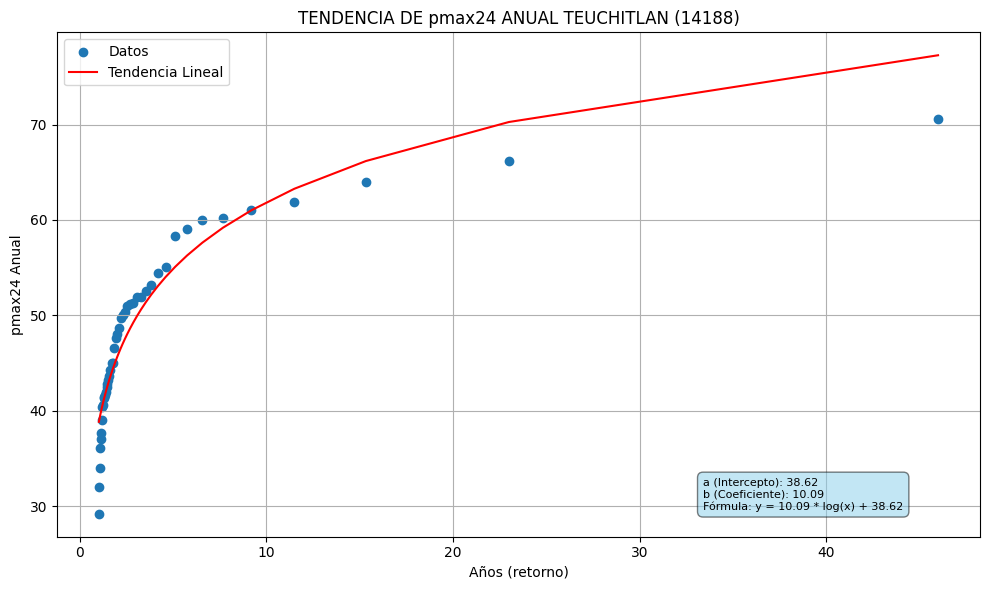

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

#Cargar Base de datos
file_path = '/content/drive/My Drive/Clima_Jalisco/estaciones_jalmes_FL.csv'
try:
    df_clima = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please ensure the file exists at the specified path in your Google Drive.")
    df_clima = None # Grarntiza no proceder con un dataframe vacio

if df_clima is not None:
    # Dar formato de fecha
    df_clima['date'] = pd.to_datetime(df_clima['date'])

    # Codigos únicos
    unique_codes = df_clima['Codigo'].unique()
    print(f"Found {len(unique_codes)} unique stations.")

    # Directorio para guardar resultados
    save_dir = '/content/drive/My Drive/Clima_Jalisco/GRAFICOS_PMAX24' # Directorio para guardar cada gráfico individual
    os.makedirs(save_dir, exist_ok=True)
    print(f"Save directory created: {save_dir}")


    for code in unique_codes:
        print(f"\nProcessing station code: {code}")
        # Filtrar datos para la estación actual
        df_filtered = df_clima[df_clima['Codigo'] == code].copy()

        if not df_filtered.empty:
            # Para poner nombre de cada gráfico y archivo
            site_name = df_filtered['site'].iloc[0] if 'site' in df_filtered.columns and not df_filtered['site'].empty else f'Code_{code}'

            #Calculo de pmax24 anual
            df_filtered = df_filtered.set_index('date')
            pmax24_annual_max = df_filtered['pmax24'].resample('AS').max()
            pmax24_annual_max = pmax24_annual_max.dropna()

            if not pmax24_annual_max.empty and len(pmax24_annual_max) > 1: # Asegurar datos suficientes para regresión
                #Preparar datos para análisis de tendencia
                pmax24_sorted = pmax24_annual_max.sort_values(ascending=False)
                df_sorted = pmax24_sorted.to_frame().reset_index()
                n = len(df_sorted)
                df_sorted['rank'] = range(1, n + 1)
                df_sorted['probability'] = df_sorted['rank'] / (n + 1)
                df_sorted['return_period'] = (n + 1) / df_sorted['rank']

                #Selección y ordenar variable por periodo de retorno
                y = df_sorted['pmax24']
                X = pd.DataFrame({'log_return_period': np.log(df_sorted['return_period'])})

                # Checar si X esta vacio despues de transformación logaritmica
                if not X.empty and not X['log_return_period'].isnull().all():
                    #Cálculo de modelo
                    try:
                        modelo = LinearRegression()
                        modelo.fit(X, y)
                        print(f"  Coeficiente: {modelo.coef_}")
                        print(f"  Intercepto: {modelo.intercept_}")

                        # Generar el gráfico de tendencia
                        fig, ax = plt.subplots(figsize=(10, 6))
                        ax.scatter(df_sorted['return_period'], y, label='Datos')
                        ax.plot(df_sorted['return_period'], modelo.predict(X), color='red', label='Tendencia Lineal')
                        ax.set_xlabel('Años (retorno)')
                        ax.set_ylabel('pmax24 Anual')
                        ax.set_title(f'TENDENCIA DE pmax24 ANUAL {site_name} {code}')
                        ax.legend()
                        ax.grid(True)

                        # adicionar datos de modelo en el gráfico
                        intercept = modelo.intercept_
                        coef = modelo.coef_[0]
                        # Chear si coeficiente es valor individual antes de formatear
                        coef_formatted = coef if np.isscalar(coef) else coef[0] # Manejar casos donde coef si es array
                        formula = f'y = {coef_formatted:.2f} * log(x) + {intercept:.2f}'
                        textstr = f'a (Intercepto): {intercept:.2f}\nb (Coeficiente): {coef_formatted:.2f}\nFórmula: {formula}'
                        ax.text(0.7, 0.05, textstr, transform=ax.transAxes, fontsize=8,
                                 verticalalignment='bottom', horizontalalignment='left', bbox=dict(boxstyle='round,pad=0.5', fc='skyblue', alpha=0.5))

                        plt.tight_layout()

                        # Guardar el gráfico de tendencia
                        file_name = f'pmax24_trend_{site_name}_{code}.png'
                        file_path = os.path.join(save_dir, file_name)
                        plt.savefig(file_path)
                        plt.close(fig) # Cerrar y gguardar

                        print(f"  Scatter plot saved to {file_path}")

                    except Exception as e:
                        print(f"  Error during model fitting or plotting for station {code}: {e}")
                        plt.close(fig) # Asegurar que fue cerrado

                else:
                    print(f"  Not enough valid data points after log transformation for station {code} to fit the model.")
            else:
                print(f"  Not enough annual maximum pmax24 data for station {code} to perform trend analysis.")
        else:
            print(f"  No data found for station code: {code}")

    print("\nScript finished.")